In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv('/content/drive/MyDrive/Prueba/insurance.csv')

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [52]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [53]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [54]:
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [41]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [19]:
dupl=df[df.duplicated()]
print(dupl)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [20]:
len(df)

1337

In [42]:
df=df.drop_duplicates()

In [43]:
len(df)

1337

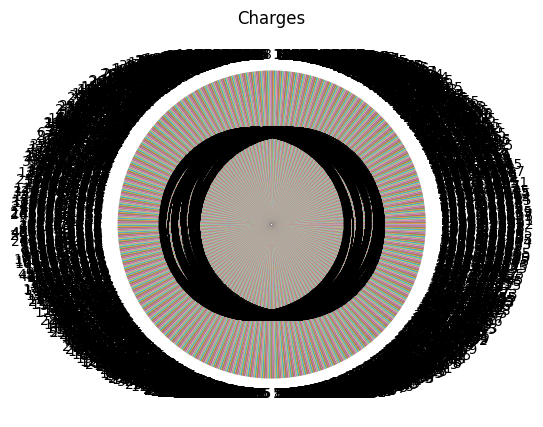

In [12]:
value= df['charges'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(value,labels=value.index,autopct='%1.2f%%')
plt.title('Charges')
plt.show()

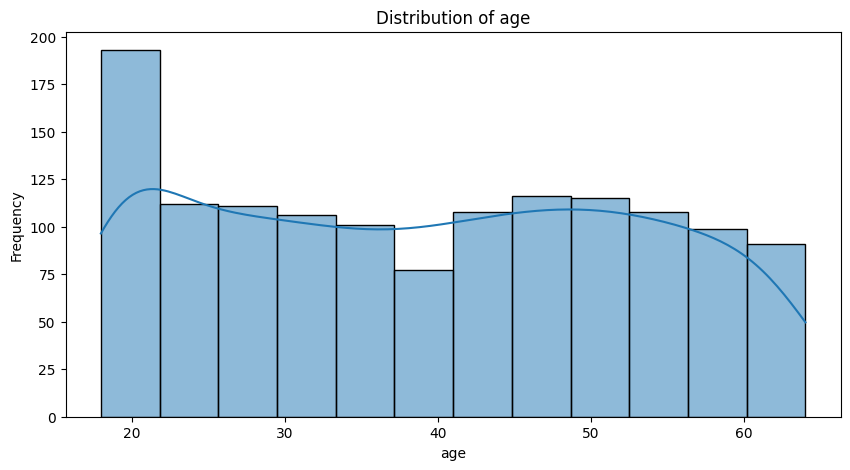

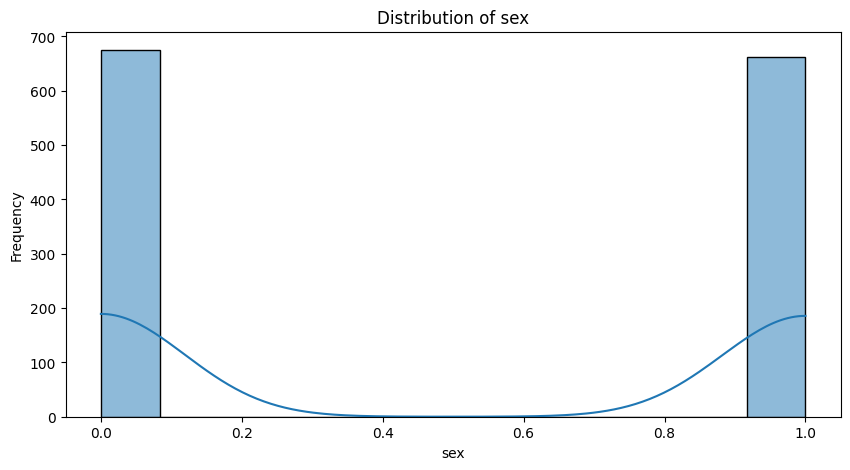

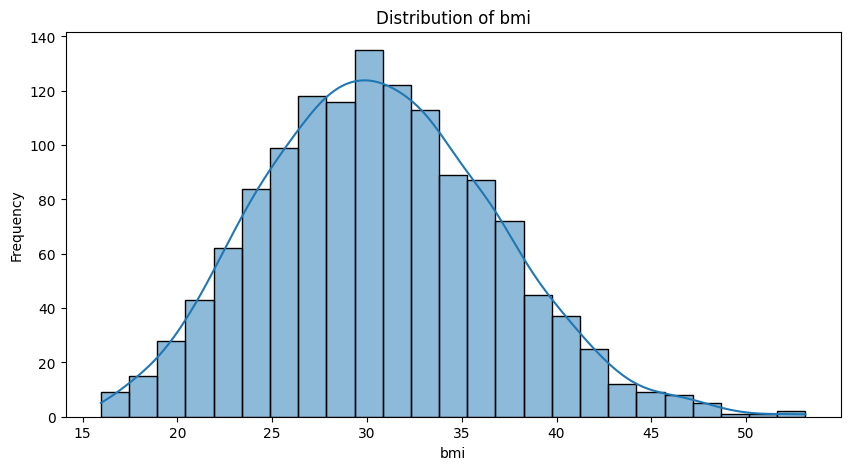

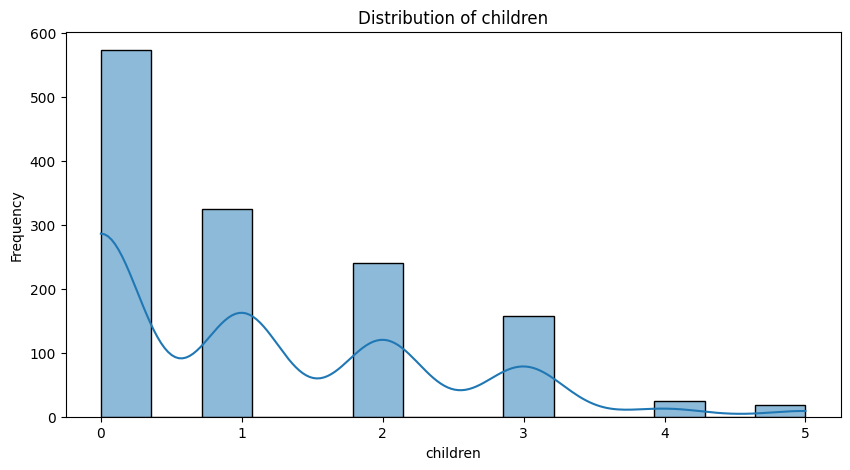

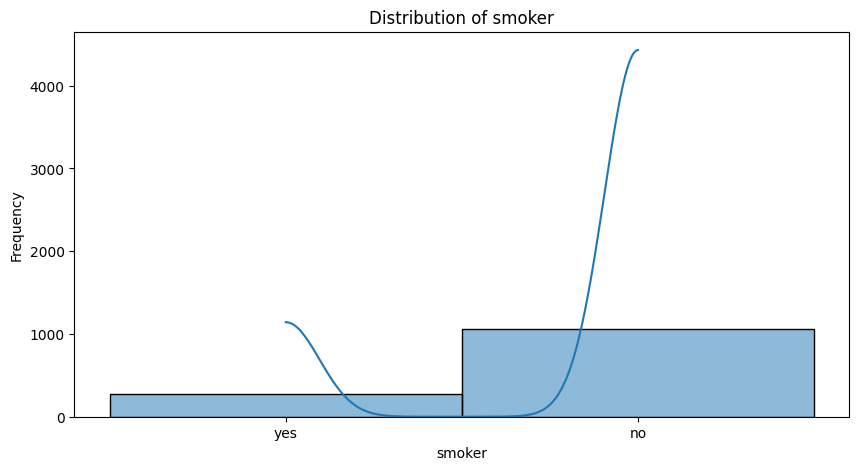

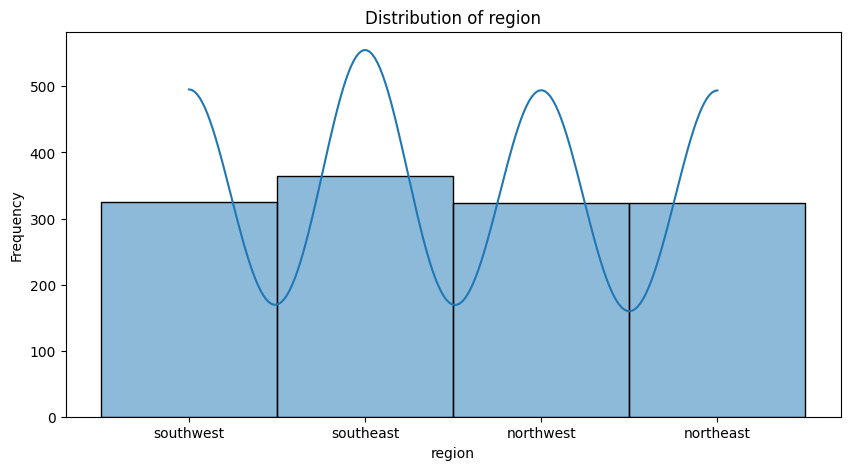

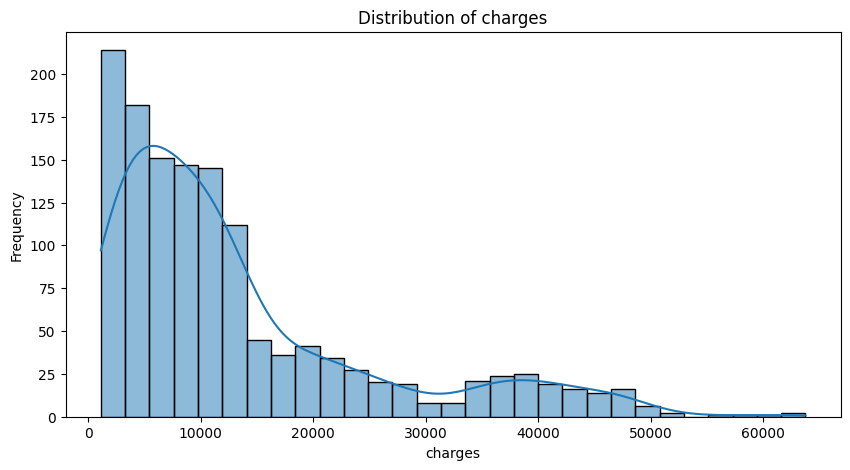

In [23]:
size=(10,5)


for i in df.columns:
  plt.figure(figsize=size)
  sns.histplot(df[i],kde=True)
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {i}')
  plt.show()

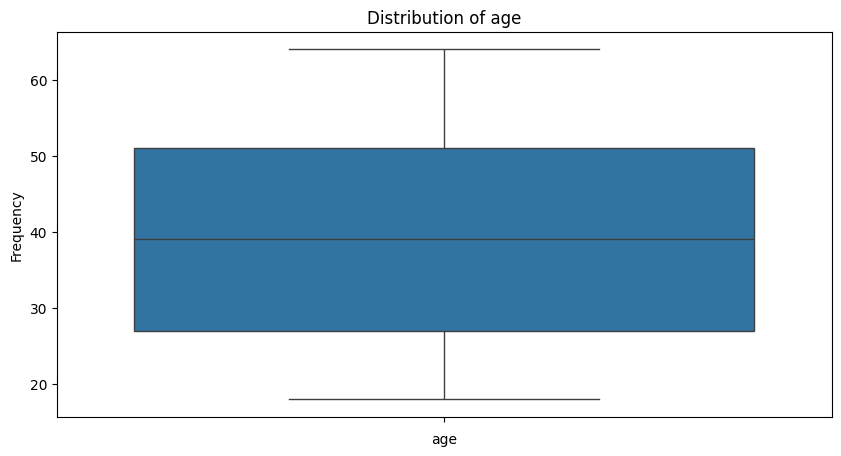

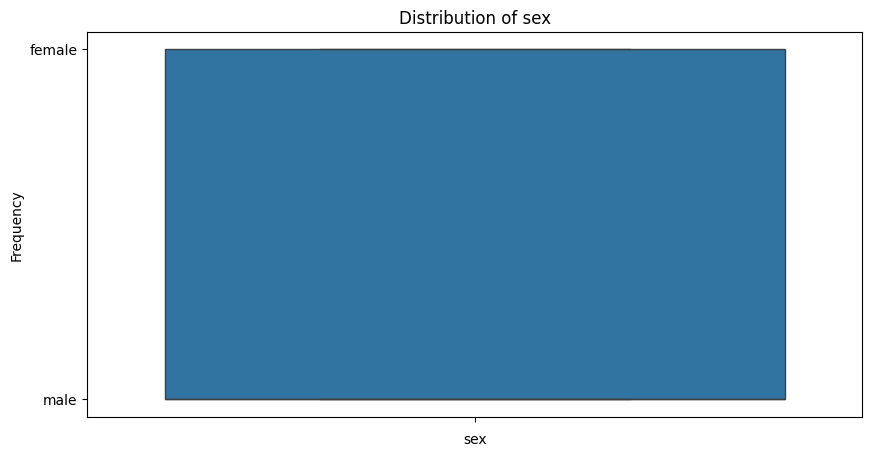

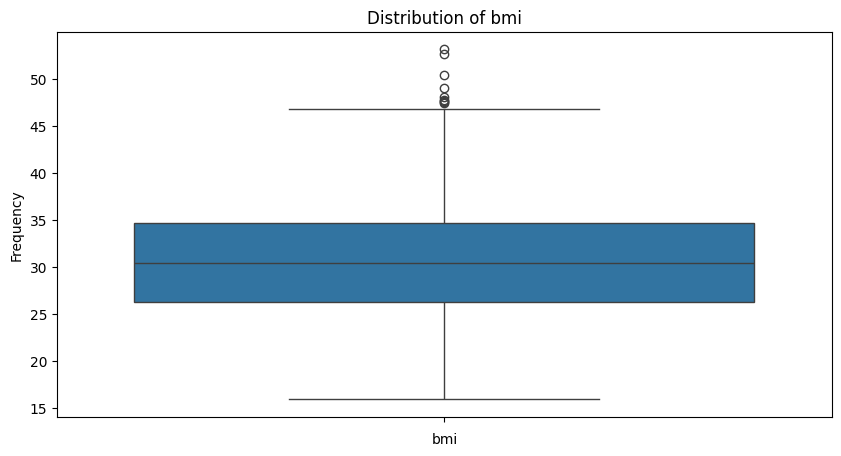

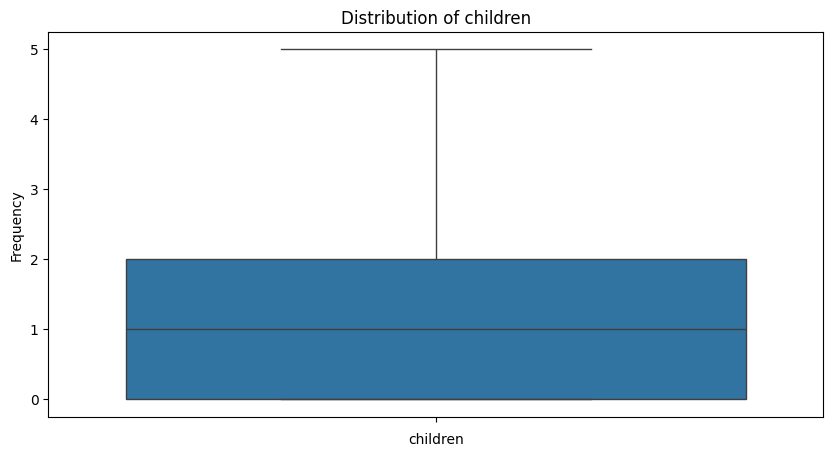

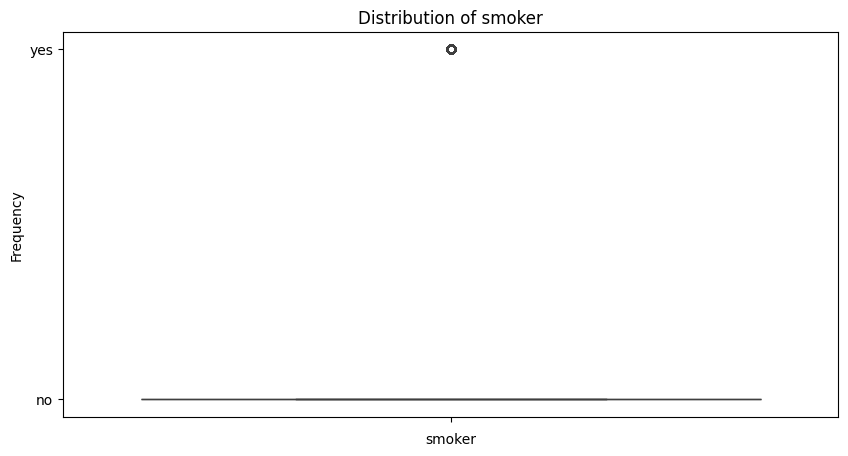

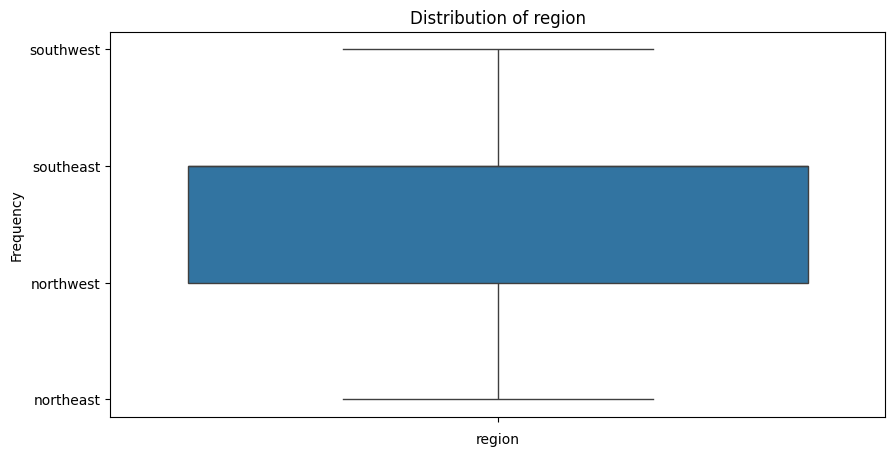

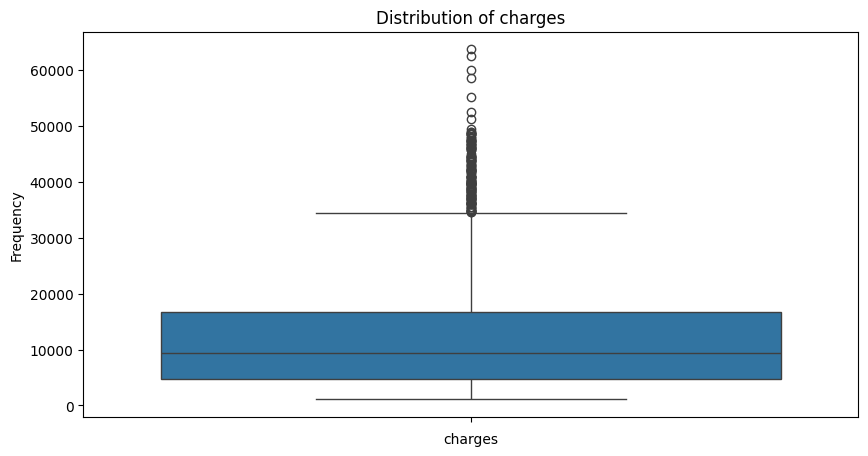

In [14]:
for i in df.columns:
  plt.figure(figsize=size)
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {i}')
  plt.show()

In [56]:
df2=df.copy()

In [57]:
# creacion de BMI, age group y smoking bmi

import pandas as pd
import numpy as np

# Supongamos que tu df ya tiene las columnas 'bmi', 'age' y 'smoker'

# 1. Crear columna BMI_category
# Clasificación estándar de la OMS
def bmi_category(bmi):
    if bmi < 18.5:
        return "underweight"
    elif 18.5 <= bmi < 25:
        return "normal"
    elif 25 <= bmi < 30:
        return "overweight"
    else:
        return "obese"

df2["BMI_category"] = df2["bmi"].apply(bmi_category)

# 2. Crear columna age_group
def age_group(age):
    if age < 30:
        return "joven"  # joven=1
    elif 30 <= age < 60:
        return "adulto" #adulto =2
    else:
        return "senior" #senior=3

df2["age_group"] = df2["age"].apply(age_group)


df2["smoking_bmi"] = df2["smoker"] * df["bmi"]

print(df2.head())


   age  sex     bmi  children  smoker  region      charges BMI_category  \
0   19    1  27.900         0       1       1  16884.92400   overweight   
1   18    0  33.770         1       0       2   1725.55230        obese   
2   28    0  33.000         3       0       2   4449.46200        obese   
3   33    0  22.705         0       0       3  21984.47061       normal   
4   32    0  28.880         0       0       3   3866.85520   overweight   

  age_group  smoking_bmi  
0     joven         27.9  
1     joven          0.0  
2     joven          0.0  
3    adulto          0.0  
4    adulto          0.0  


In [58]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


#LINEAR

X=df.drop('charges',axis=1)
y=df['charges']
scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

linr=LinearRegression()
linr.fit(X_train,y_train)

y_pred=linr.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error of Linear:',mse)
  # Procesar inputs y retornar predicción    return predicted_cost


#RANDOMFOREST
X=df.drop('charges',axis=1)
y=df['charges']
scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

rand=RandomForestRegressor(n_estimators=100,random_state=42)
rand.fit(X_train,y_train)

y_pred=rand.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error of RandomForest:',mse)



Mean Squared Error of Linear: 33805466.89868861
Mean Squared Error of RandomForest: 21073584.549517997
